In [ ]:
import cv2
import keras
import numpy as np
import pandas as pd
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [ ]:
x = np.load('/content/drive/My Drive/LICT training/Mosfiqun Nahid Hassan/Preprocessing_Data( Jupyter)/Numta_x.npy')/255.0
y = np.load('/content/drive/My Drive/LICT training/Mosfiqun Nahid Hassan/Preprocessing_Data( Jupyter)/Numta_y.npy')

In [ ]:
x = x.reshape(-1,28,28,1)
y = to_categorical(y)

In [ ]:
x.shape

(72045, 28, 28, 1)

In [ ]:
y.shape

(72045, 10)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dense_7 (Dense)              (None, 12, 12, 64)        2112      
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)             

In [ ]:
history = model.fit(x, y, validation_split=0.2, epochs=30, batch_size=150)

Train on 57636 samples, validate on 14409 samples
Epoch 1/30
57636/57636 [==============================] - 12s 204us/step - loss: 1.5110 - accuracy: 0.4787 - val_loss: 0.4017 - val_accuracy: 0.8922
Epoch 2/30
57636/57636 [==============================] - 5s 93us/step - loss: 1.0270 - accuracy: 0.6492 - val_loss: 0.3569 - val_accuracy: 0.8974
Epoch 3/30
57636/57636 [==============================] - 5s 93us/step - loss: 0.8962 - accuracy: 0.6929 - val_loss: 0.2905 - val_accuracy: 0.9112
Epoch 4/30
57636/57636 [==============================] - 5s 93us/step - loss: 0.8230 - accuracy: 0.7175 - val_loss: 0.2652 - val_accuracy: 0.9187
Epoch 5/30
57636/57636 [==============================] - 5s 94us/step - loss: 0.7788 - accuracy: 0.7321 - val_loss: 0.2599 - val_accuracy: 0.9198
Epoch 6/30
57636/57636 [==============================] - 6s 100us/step - loss: 0.7427 - accuracy: 0.7448 - val_loss: 0.2606 - val_accuracy: 0.9184
Epoch 7/30
57636/57636 [==============================] - 7s 118u

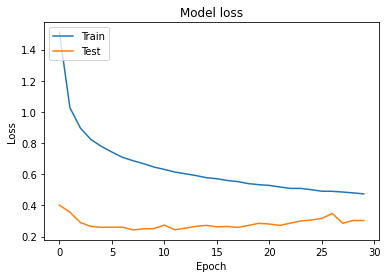

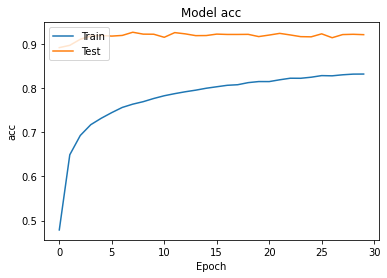

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('val_accuracy_92.h5 ')

In [ ]:
all_img = []
for i in range(0,10):
  img1 = cv2.imread(str(i)+'.jpg',0)
  (thresh, im_bw) = cv2.threshold(img1, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  inv = cv2.bitwise_not(im_bw)
  all_img.append(cv2.resize(inv, (28,28)))

In [ ]:
all_img = np.array(all_img)

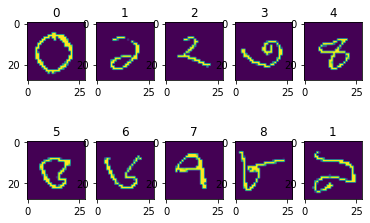

In [ ]:
for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(all_img[i-1])
  plt.title(np.argmax(model.predict(np.reshape(all_img[i-1],(-1,28,28,1)))))